In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
df = pd.read_csv('cpdata.csv')

In [72]:
df.head()

,temperature,humidity,ph,rainfall,labels
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [73]:
df.tail()

,temperature,humidity,ph,rainfall,labels
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon
3099,26.986037,89.413849,6.260839,58.548767,watermelon


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   labels       3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [75]:
df.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [76]:
df["labels"].value_counts()

mango           100
Tea             100
Moth Beans      100
Adzuki Beans    100
pomegranate     100
watermelon      100
maize           100
orange          100
Coconut         100
apple           100
rice            100
Jute            100
Pigeon Peas     100
Coffee          100
Black gram      100
grapes          100
muskmelon       100
Sugarcane       100
Rubber          100
Kidney Beans    100
papaya          100
banana          100
Tobacco         100
millet          100
Chickpea        100
Peas            100
Lentil          100
Cotton          100
wheat           100
Mung Bean       100
Ground Nut      100
Name: labels, dtype: int64

In [77]:
df['labels'].nunique()

31

In [78]:
df.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
labels         0
dtype: int64

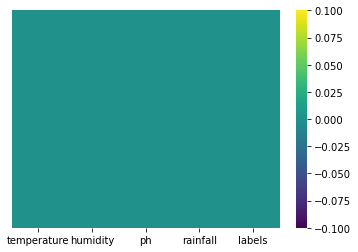

In [79]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

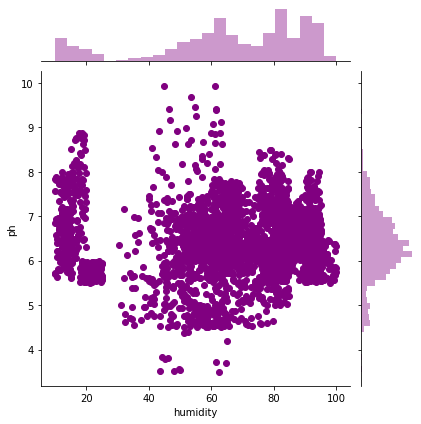

In [80]:
sns.jointplot(data=df,x='humidity',y='ph',color='purple')

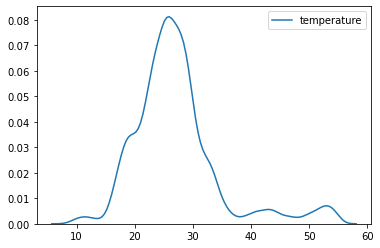

In [81]:
sns.kdeplot(df['temperature'])

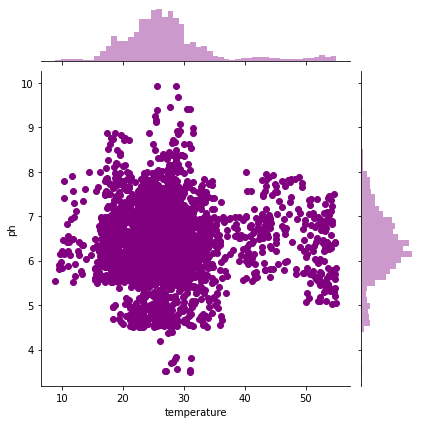

In [82]:
sns.jointplot(data=df,x='temperature',y='ph',color='purple')

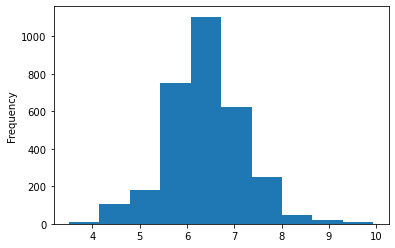

In [83]:
df["ph"].plot.hist()

In [84]:
new= df.drop('rainfall',axis=1)

In [85]:
new.head()

,temperature,humidity,ph,labels
0,20.879744,82.002744,6.502985,rice
1,21.770462,80.319644,7.038096,rice
2,23.004459,82.320763,7.840207,rice
3,26.491096,80.158363,6.980401,rice
4,20.130175,81.604873,7.628473,rice


# Train Test Split
Let's split up the data into a training set and a test set!

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = new.drop('labels',axis=1)
y = new['labels']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# DecisionTree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dtree = DecisionTreeClassifier()

In [91]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
rf_prediction = dtree.predict(X_test)

In [93]:
dtree.predict([[20.8,82.0,6.5]])[0]

'rice'

In [94]:
predictions=dtree.predict(X_test)

In [95]:
import pickle

In [96]:
file=open('crop_pred_dtree.pkl','wb')
pickle.dump(dtree,file)

In [97]:
from sklearn.metrics import classification_report,confusion_matrix

In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        33
  Black gram       0.68      0.84      0.75        25
    Chickpea       1.00      1.00      1.00        27
     Coconut       0.88      0.88      0.88        33
      Coffee       0.43      0.46      0.45        28
      Cotton       0.47      0.53      0.50        30
  Ground Nut       0.89      0.76      0.82        33
        Jute       0.52      0.35      0.42        40
Kidney Beans       1.00      1.00      1.00        29
      Lentil       0.52      0.45      0.48        33
  Moth Beans       0.63      0.57      0.60        30
   Mung Bean       0.89      0.82      0.85        38
        Peas       1.00      1.00      1.00        23
 Pigeon Peas       0.46      0.52      0.49        25
      Rubber       0.76      0.76      0.76        34
   Sugarcane       0.55      0.57      0.56        28
         Tea       0.97      0.97      0.97        33
     Tobacco       0.78    

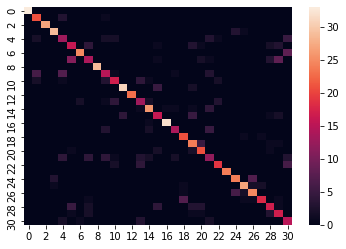

In [99]:
y_predict_test=dtree.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)

sns.heatmap(cm)


In [100]:
#print(cm)

In [101]:
print("Total Accuracy DecisionTree:",accuracy_score(y_test,y_predict_test))

Total Accuracy DecisionTree: 0.7075268817204301


# RandomForest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
clf=RandomForestClassifier()

In [104]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [105]:
input_features=[20.8,82.0,6.5]
infprob=clf.predict([input_features])[0]
infprob

'rice'

In [106]:
predictions=clf.predict(X_test)

In [107]:
file=open('crop_pred_rand.pkl','wb')
pickle.dump(clf,file)

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        33
  Black gram       0.69      0.88      0.77        25
    Chickpea       1.00      1.00      1.00        27
     Coconut       0.94      0.88      0.91        33
      Coffee       0.54      0.50      0.52        28
      Cotton       0.46      0.63      0.54        30
  Ground Nut       0.91      0.94      0.93        33
        Jute       0.59      0.33      0.42        40
Kidney Beans       1.00      1.00      1.00        29
      Lentil       0.58      0.45      0.51        33
  Moth Beans       0.85      0.73      0.79        30
   Mung Bean       1.00      0.95      0.97        38
        Peas       1.00      1.00      1.00        23
 Pigeon Peas       0.70      0.56      0.62        25
      Rubber       0.84      0.79      0.82        34
   Sugarcane       0.79      0.68      0.73        28
         Tea       0.94      1.00      0.97        33
     Tobacco       0.79    

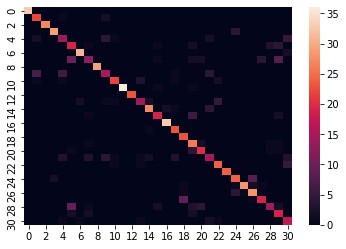

In [109]:
y_predict=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predict)

sns.heatmap(cm)


In [110]:
print("Total Accuracy RandomForest:",accuracy_score(y_test,y_predict))

Total Accuracy RandomForest: 0.7634408602150538


# K-Nearest Neighbor(KNN)

In [111]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3 )  
knn.fit(X_train, y_train)  

KNeighborsClassifier(p=3)

In [112]:
KNNINT=[20.8,82.0,1.3]
result=knn.predict([KNNINT])[0]
result

'rice'

In [113]:
knnprediction=knn.predict(X_test)

In [114]:
file=open('crop_pred_knn.pkl','wb')
pickle.dump(knn,file)

In [115]:
print(classification_report(y_test,knnprediction))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        33
  Black gram       0.44      0.76      0.56        25
    Chickpea       1.00      0.93      0.96        27
     Coconut       0.85      0.70      0.77        33
      Coffee       0.44      0.61      0.51        28
      Cotton       0.51      0.77      0.61        30
  Ground Nut       0.60      0.79      0.68        33
        Jute       0.42      0.28      0.33        40
Kidney Beans       1.00      1.00      1.00        29
      Lentil       0.31      0.30      0.31        33
  Moth Beans       0.56      0.47      0.51        30
   Mung Bean       0.90      0.95      0.92        38
        Peas       0.92      1.00      0.96        23
 Pigeon Peas       0.73      0.32      0.44        25
      Rubber       0.67      0.24      0.35        34
   Sugarcane       0.60      0.43      0.50        28
         Tea       0.86      0.91      0.88        33
     Tobacco       0.31    

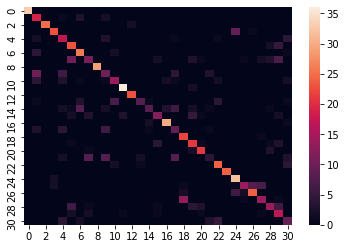

In [116]:
y_predict=knn.predict(X_test)
knncm=confusion_matrix(y_test,y_predict)

sns.heatmap(knncm)

In [117]:
print("Total Accuracy KNN:",accuracy_score(y_test,y_predict))

Total Accuracy KNN: 0.6408602150537634


# Support Vector Machine Algorithm(SVM)

In [118]:
from sklearn.svm import SVC # "Support vector classifier"  
svc = SVC(kernel='linear', random_state=0)  
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [119]:
SVC=[26.986037,89.413849,6.260839]
results=svc.predict([SVC])[0]
results

'watermelon'

In [120]:
svcprediction=svc.predict(X_test)

In [121]:
file=open('crop_pred_svc.pkl','wb')
pickle.dump(svc,file)

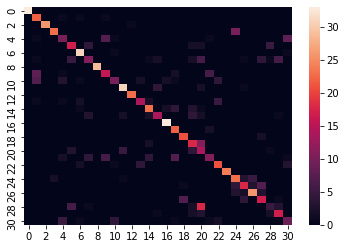

In [122]:
y_predict=svc.predict(X_test)
svccm=confusion_matrix(y_test,y_predict)

sns.heatmap(svccm)

In [123]:
print("Total Accuracy SVC:",accuracy_score(y_test,y_predict))

Total Accuracy SVC: 0.6580645161290323
